In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp

In [8]:
from src.settings import PHOTON_VOLTAGE

In [9]:
print(PHOTON_VOLTAGE)

{'shade1': {578: 360, 546: 514, 436: 825, 405: 715, 365: 1040}, 'shade2': {578: 665, 546: 775, 436: 1155, 405: 1280, 365: 1620}, 'shade3': {578: 550, 546: 695, 436: 1174, 405: 1310, 365: 1650}}


In [28]:
data = pd.read_csv('src/data/u2.csv') # INPUT IS multiplied by 10 for keeping int values so we can use ** in python 
print(data)

    InputU2  VoltageU2  VoltageUA
0         5       48.4        5.0
1        11      105.7        6.0
2        13      128.8        7.0
3        14      137.5        7.1
4        15      153.8        7.2
..      ...        ...        ...
74      283     2830.0     7700.0
75      286     2860.0     6850.0
76      290     2900.0     4950.0
77      295     2950.0     3000.0
78      300     3000.0     1850.0

[79 rows x 3 columns]


In [29]:
U1 = 3.55
U3 = 1.37
FRANK_HERTZ_TEMPERATURE = 171

In [6]:
def get_extreme(U2, a, b,c):
    I = a*U2**2 + b*U2 + c 
    return I 

In [ ]:
# Plotting the data
plt.figure(figsize=(40, 20))
plt.plot(data["Input"], data["U2"], label="U2 Voltage", marker='o') # change 
plt.plot(data["Input"], data["UA"], label="UA Voltage", marker='s') # change
plt.xlabel("Voltage /V ")
plt.ylabel("Current / a.u")
plt.title("IA(U2)")
plt.legend()
plt.grid(True)
plt.show()

In [34]:
popt_max, _ = sp.optimize.curve_fit(poly2, data["InputU2"], data["VoltageU2"])
print(sp.optimize.curve_fit(poly2, data["InputU2"], data["VoltageU2"]))
print('other:')
print(popt_max)
print('other:')
print(_)


(array([-2.99266822e-02,  1.84543175e+01, -3.46210638e+02]), array([[ 1.38860104e-06, -5.72729368e-04,  3.89422394e-02],
       [-5.72729368e-04,  2.81872179e-01, -2.32628298e+01],
       [ 3.89422394e-02, -2.32628298e+01,  2.78198699e+03]]))
other:
[-2.99266822e-02  1.84543175e+01 -3.46210638e+02]
other:
[[ 1.38860104e-06 -5.72729368e-04  3.89422394e-02]
 [-5.72729368e-04  2.81872179e-01 -2.32628298e+01]
 [ 3.89422394e-02 -2.32628298e+01  2.78198699e+03]]


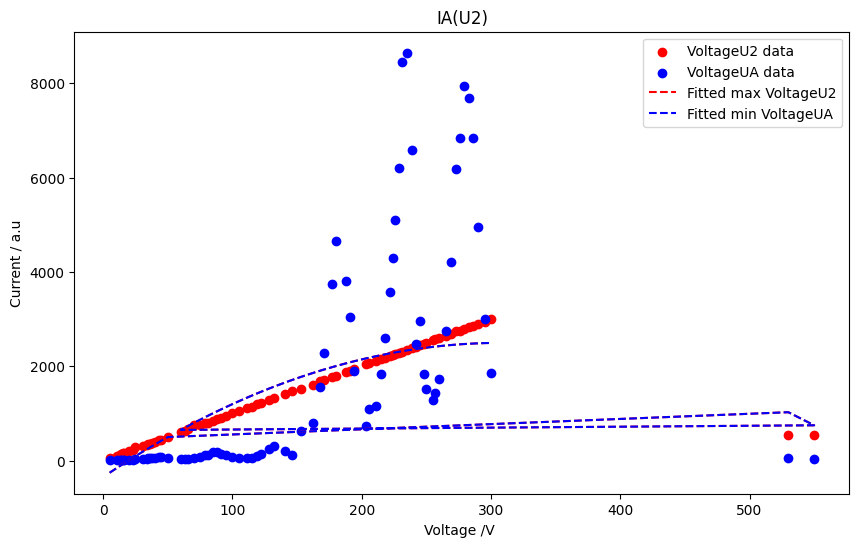

In [25]:
def poly2(x, a, b, c):
    popt, _ = sp.optimize.curve_fit(poly2, data["InputU2"], data["VoltageU2"])
        return a * x**2 + b * x + c

# Fit the curve
popt_max, _ = sp.optimize.curve_fit(poly2, data["InputU2"], data["VoltageU2"])
popt_min, _ = sp.optimize.curve_fit(poly2, data["InputU2"], data["VoltageUA"])

# Plot the data and the fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(data["InputU2"], data["VoltageU2"], color='red', label='VoltageU2 data')
plt.scatter(data["InputU2"], data["VoltageUA"], color='blue', label='VoltageUA data')

plt.plot(data["InputU2"], poly2(data["InputU2"],*popt_max), color='red', linestyle='--', label='Fitted max VoltageU2')
plt.plot(data["InputU2"], poly2(data["InputU2"],*popt_max), color='blue', linestyle='--', label='Fitted min VoltageUA')

plt.xlabel("Voltage /V ")
plt.ylabel("Current / a.u")
plt.title("IA(U2)")
plt.legend()

plt.show()